In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner
import utils
from IPython.display import display

In [2]:
sol_rad = 6.957e10 #cm
c = 299792458 * 100 #cm/s
parsec = 3.08568e18 #cm
jansky = 1e-23

In [4]:
sampler = emcee.backends.HDFBackend("data/mcmc_agEf.h5", read_only=True)
# flat_samples = sampler.get_chain(flat=True)
labels = [r"$\alpha$", r"$\gamma$", r"log(E$_{\rm char, \nu}$)", r"$f_{\rm Y}$"] #, r"log($\phi$)"
ndim = 4

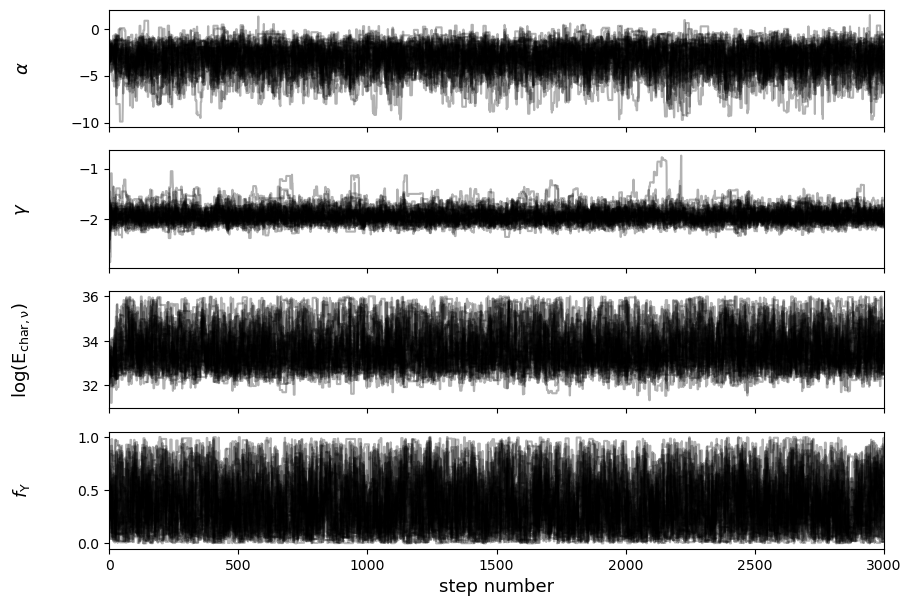

In [5]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = [r"$\alpha$", r"$\gamma$", r"log(E$_{\rm char, \nu}$)", r"$f_{\rm Y}$"] #, r"log($\phi$)"
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], fontsize=13)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number", fontsize=13);

In [6]:
tau = sampler.get_autocorr_time()
print(tau)
print(np.sum(tau))
# print(np.mean(sampler.acceptance_fraction), np.std(sampler.acceptance_fraction))
acceptance_fraction = sampler.accepted / sampler.iteration
print(np.mean(acceptance_fraction), np.std(acceptance_fraction))

[26.74865472 23.19781081 28.45685638 24.74491359]
103.14823549446231
0.21951041666666668 0.009994437472011338


(92800, 4)


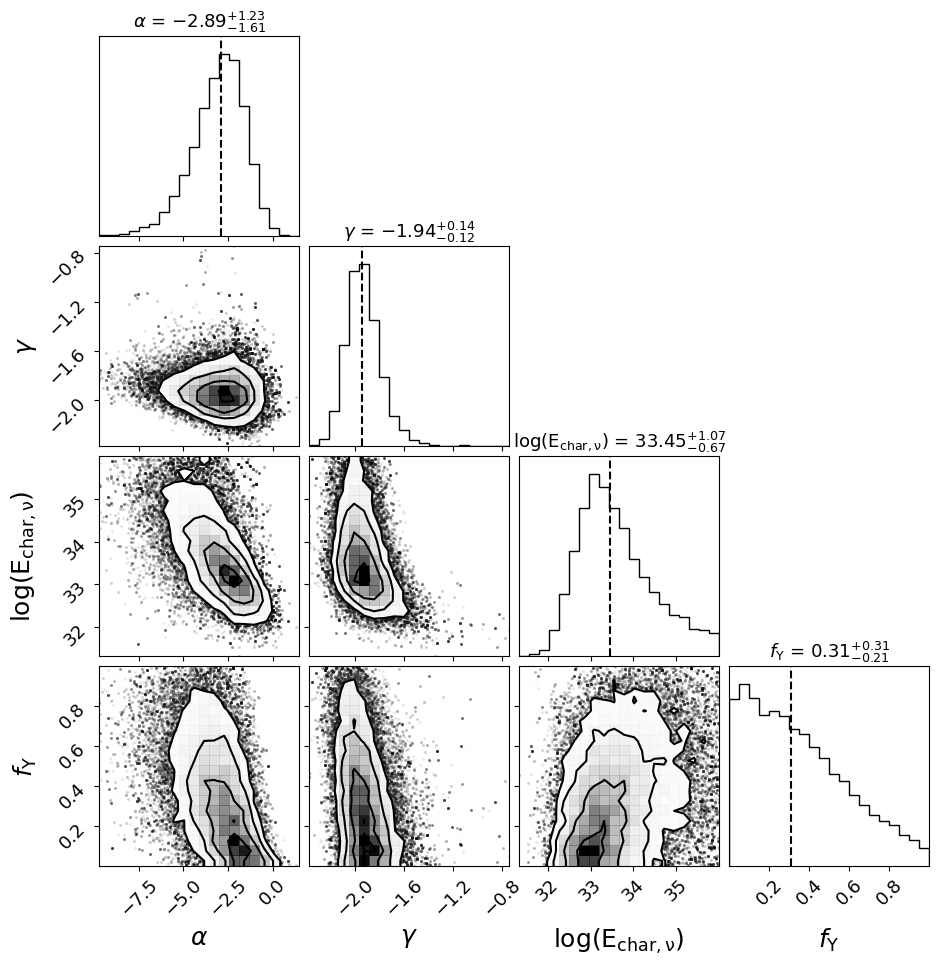

In [7]:
flat_samples = sampler.get_chain(discard=100, flat=True)
# flat_samples2 = sampler2.get_chain(discard=1000, thin=90, flat=True)
# flat_samples3 = sampler3.get_chain(discard=1000, thin=90, flat=True)
print(flat_samples.shape)

# Convert E_char to E_charnu
# flat_samples[:, 2] = np.log10(10**flat_samples[:,2]/6e8)

fig = corner.corner(
    flat_samples, labels=labels, show_titles=True, title_kwargs={'fontsize':13}, label_kwargs={'fontsize':18}, quantiles=[0.5]
);
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=13)
# fig.savefig('plots/cornerplot_shintech_mcmc_agEf.pdf')#jpg', dpi=300)